In [23]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [24]:
# Read IMDB data from csv
# Link: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset

filename = '/Users/ronarcentales/Desktop/Projects/imdb_movies.csv'

df = pd.read_csv(filename)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# pd.reset_option('max_columns')
# pd.reset_option('max_rows')

In [7]:
#Let's look at the data (first 5 rows)

df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [4]:
#Let's look at how many rows and columns we are dealing with

df.shape

(10178, 12)

In [5]:
#Let's look at the column names

df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [25]:
#Let's look at the datatypes for each column

df.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [7]:
#Let's change the 'score', 'budget_x', and 'revenue' columns to data type int64 to get rid of the decimal at the end

df['score'] = df['score'].astype('int64')

df['budget_x'] = df['budget_x'].astype('int64')

df['revenue'] = df['revenue'].astype('int64')

In [8]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,12/15/2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,04/05/2023,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,01/05/2023,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,03/17/2023,61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US


In [7]:
#Let's find how many duplicate rows exist in the dataframe

df.duplicated().value_counts()

#There are no duplicate rows

False    10178
dtype: int64

In [11]:
#Find missing values for all columns

df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [22]:
# Let's find what percent of data is missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))
    
# Not much data appears to be missing. The 'genre' and 'crew' columns won't be the focus for analysis

names - 0.0%
date_x - 0.0%
score - 0.0%
genre - 0.008351346040479466%
overview - 0.0%
crew - 0.005502063273727648%
orig_title - 0.0%
status - 0.0%
orig_lang - 0.0%
budget_x - 0.0%
revenue - 0.0%
country - 0.0%


In [26]:
# I suspect there to be a correlation between the budget and revenue. Let's look at it:

df.corr(method = 'pearson') #pearson, kendall, spearman

# There is a correlation of 0.67383 between budget and revenue which indictaes a strong correlation

/var/folders/07/xkj6mzdx7_q20x3nxt1jtpw80000gn/T/ipykernel_9379/435793504.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson') #pearson, kendall, spearman


,score,budget_x,revenue
score,1.000000,-0.23547,0.096533
budget_x,-0.235470,1.00000,0.673830
revenue,0.096533,0.67383,1.000000


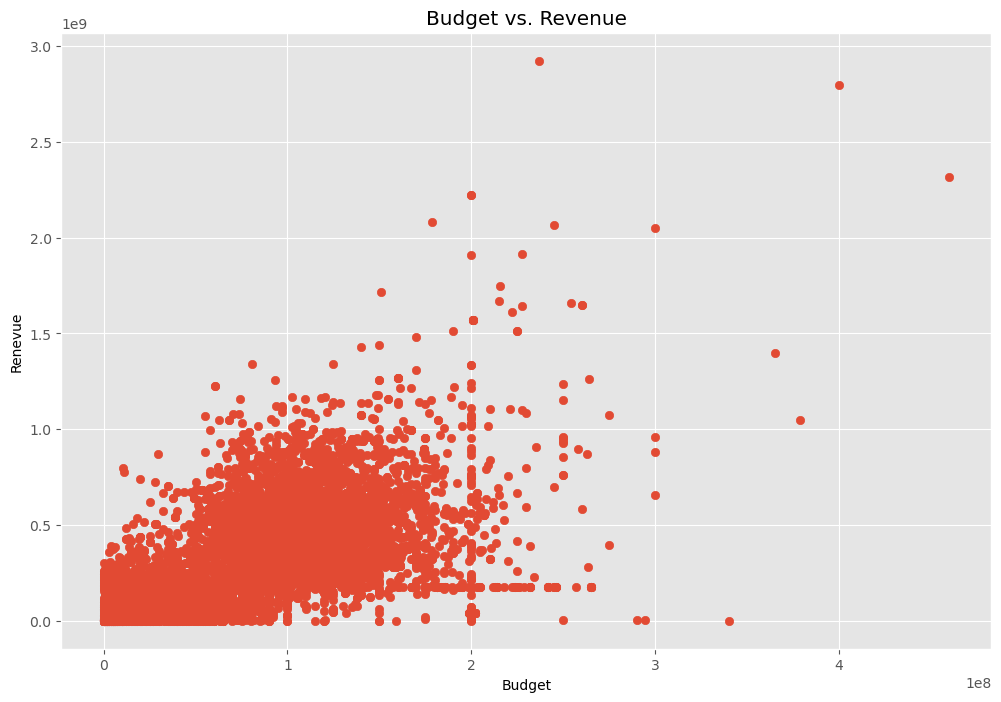

In [33]:
#Make a scatterplot using matplotlib

plt.scatter(x = df['budget_x'], y = df['revenue'])

plt.title('Budget vs. Revenue')

plt.xlabel('Budget')

plt.ylabel('Renevue')

plt.show()

<Axes: xlabel='budget_x', ylabel='revenue'>

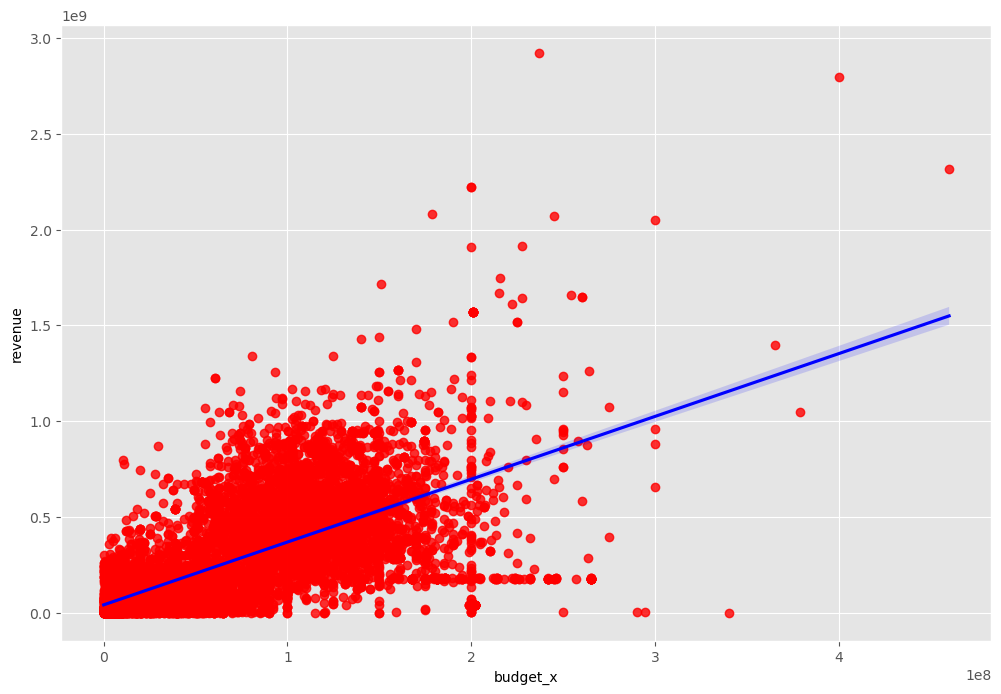

In [35]:
#Make a scatterplot with linear regression using seaborn

sns.regplot(x = 'budget_x', y = 'revenue', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

/var/folders/07/xkj6mzdx7_q20x3nxt1jtpw80000gn/T/ipykernel_9379/2117097282.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


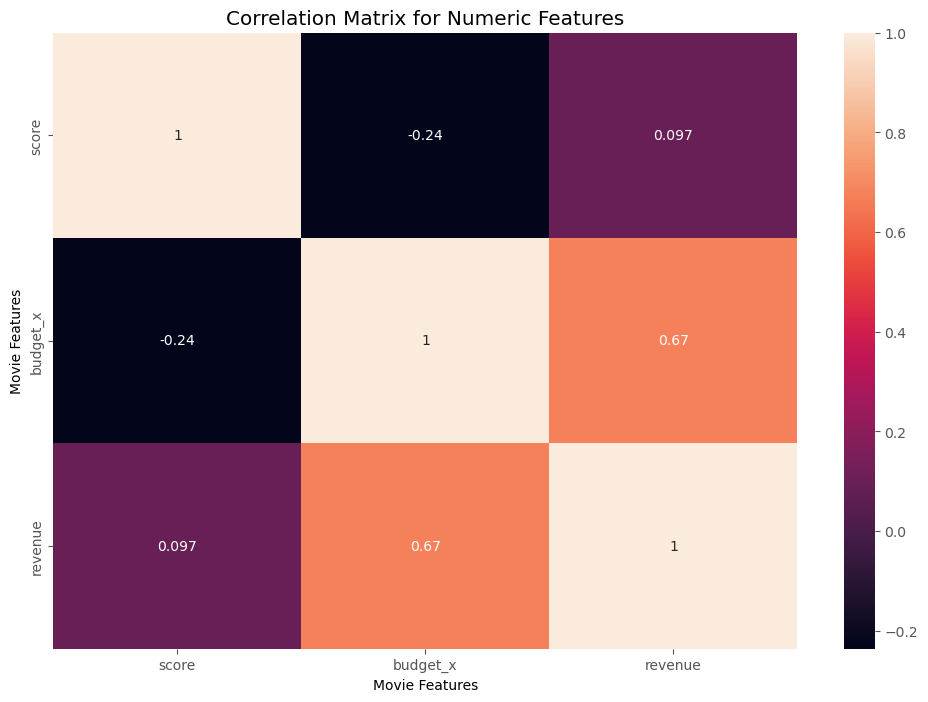

In [15]:
# Let's create a heatmap showing a visual presentation for correlations between variables

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [20]:
# Let's determine a linear regression line to predict a film's revenue based on its budget since
# there is a strong correlation between revenue and budget

lm = LinearRegression()
lm

X = df[['budget_x']]
Y = df[['revenue']]

lm.fit(X, Y)

lm.intercept_

array([40355805.32566723])

In [13]:
lm.coef_

array([3.27953894])

In [19]:
# The final estimated linear regression model we get is: 
# (predicted_revenue) = 40355805.32566723 + 3.27953894*(budget)

# We can use this linear equation to predict a film's revenue based on its budget